In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Stroke_Disease.csv")

In [3]:
df.duplicated().sum()

0

In [4]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<Axes: xlabel='bmi', ylabel='Count'>

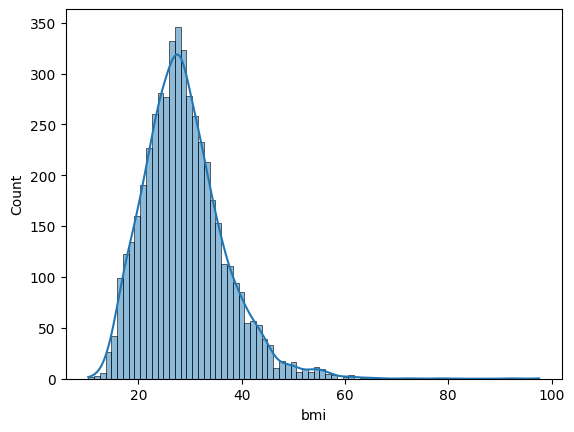

In [5]:
sns.histplot(df["bmi"],kde=True)

In [6]:
df["bmi"].fillna(df["bmi"].mean(),inplace=True)

In [7]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


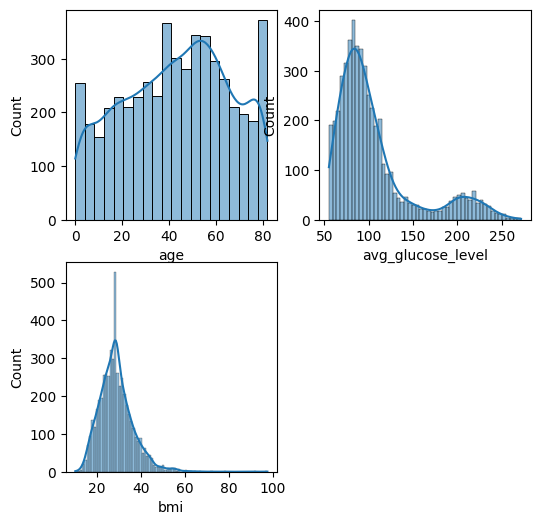

In [10]:
col=["age","avg_glucose_level","bmi"]
plt.figure(figsize=(6,6))
for i in range(len(col)):
    plt.subplot(2,2,i+1)
    sns.histplot(df[col[i]],kde=True)
plt.show()

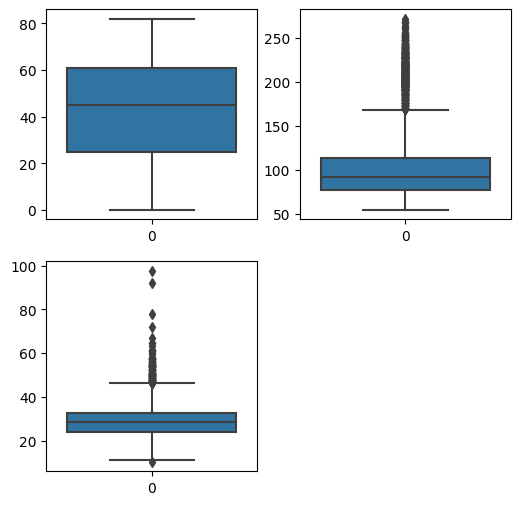

In [11]:
plt.figure(figsize=(6,6))
for i in range(len(col)):
    plt.subplot(2,2,i+1)
    sns.boxplot(df[col[i]])
plt.show()

In [12]:
df["stroke"].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [13]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [14]:
df["gender"]=np.where(df["gender"]=="Male",1,0)

<Axes: xlabel='gender', ylabel='count'>

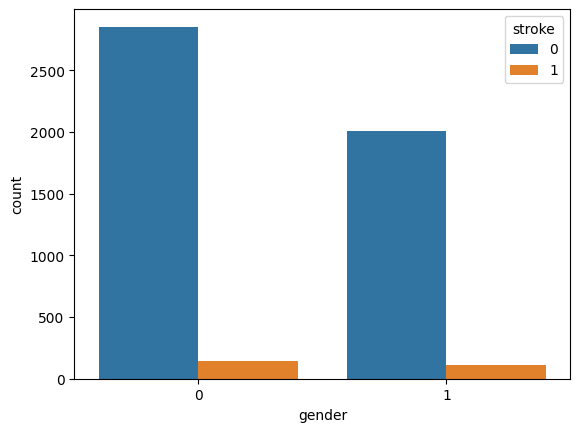

In [15]:
sns.countplot(x="gender",hue="stroke",data=df)



In [16]:
df["ever_married"]=np.where(df["ever_married"]=="Yes",1,0)

<Axes: xlabel='ever_married', ylabel='count'>

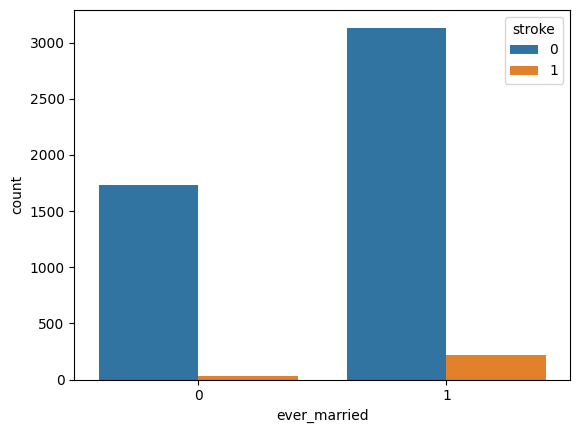

In [17]:
sns.countplot(x="ever_married",hue="stroke",data=df)

In [18]:
df["work_type"].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [19]:
from sklearn.preprocessing import OrdinalEncoder
order=[["children","Never_worked","Self-employed","Private","Govt_job"]]
obj=OrdinalEncoder(categories=order)
df[["work_type"]]=obj.fit_transform(df[["work_type"]])


<Axes: xlabel='work_type', ylabel='count'>

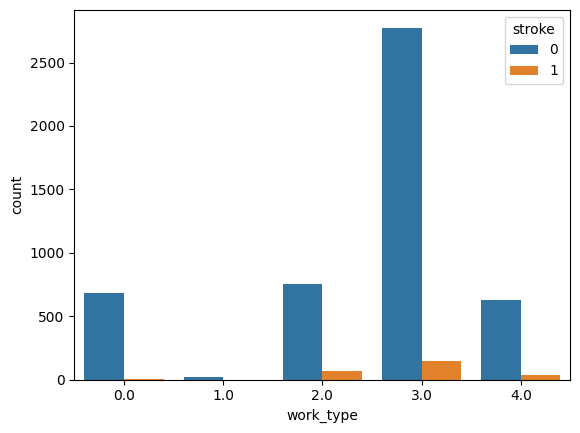

In [20]:
sns.countplot(x="work_type",hue="stroke",data=df)

In [21]:
df["smoking_status"].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [22]:
from sklearn.preprocessing import OrdinalEncoder
cat=[["never smoked","Unknown","formerly smoked","smokes"]]
ord=OrdinalEncoder(categories=cat)
df[["smoking_status"]]=ord.fit_transform(df[["smoking_status"]])

<Axes: xlabel='smoking_status', ylabel='count'>

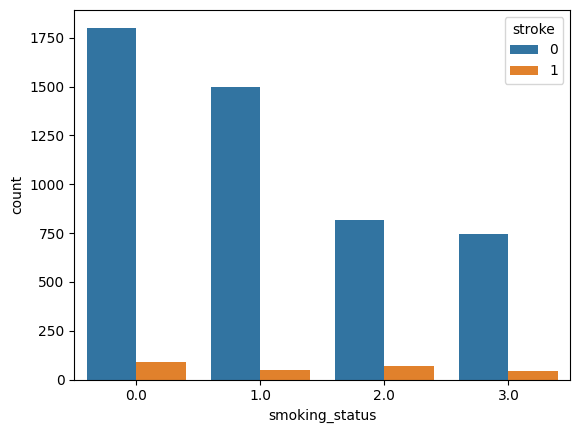

In [23]:
sns.countplot(x="smoking_status",hue="stroke",data=df)


<Axes: xlabel='Residence_type', ylabel='count'>

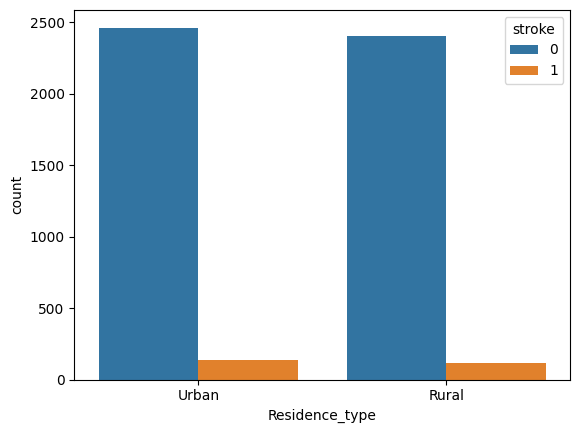

In [24]:
sns.countplot(x="Residence_type",hue="stroke",data=df)